In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#We will have V both as row and column vector, here is our test sample
VR = np.array([1,2,3])
VC = np.reshape(VR,(3,1))
Y = np.array([[1,2,3],[4,5,6],[7,8,9]])

J1 = VR.conj()*Y
#delS = (Sref-S)

In [52]:
get_S(Y,VC)

array([[ 14],
       [ 64],
       [150]])

In [11]:
J1

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

In [17]:
J2P = np.reshape(Y@VC,(3))
J2  = np.diag(J2P)

In [22]:
Jreal = J1 +J2
Jimg = 1j*J1 - 1J*J2

In [23]:
delS = np.array([1,2,3])
delVr = np.real(delS@Jreal)

In [25]:
print(Jreal)
print("Vr")
print(delVr)

[[15  4  9]
 [ 4 42 18]
 [ 7 16 77]]
Vr
[ 44 136 276]


# Gradient Descent Approach to Load flow analysis

In [167]:
#Generating Y buses and a test bench
def get_y(n, avg_conn, min_y, max_y):
    y_mat = np.zeros((n, n), dtype='complex128')
    for i in range(n):
        num_connections = min(np.random.poisson(avg_conn), n-1)
        connected_buses = np.random.choice([j for j in range(n) if j != i], size=num_connections, replace=False)

        y_mat[i, connected_buses] = (
            np.random.uniform(min_y, max_y, size=num_connections) -
            1j * np.random.uniform(min_y, max_y, size=num_connections)*2
        )
    y_mat = (y_mat + y_mat.T) / 2
    
    yy_mat = np.zeros((n, n), dtype='complex128')
    for i in range(n):
        for j in range(n):
            yy_mat[i][i] += y_mat[i][j]
            if(i!=j): yy_mat[i][j] = 0-y_mat[i][j]

    return yy_mat


def get_v(n, mag_high, mag_low, angle_high, angle_low):
    mag = np.random.rand(n, 1) * (mag_high - mag_low) + mag_low
    angles = np.random.rand(n, 1) * (angle_high - angle_low) + angle_low
    angles = np.deg2rad(angles)
    v = mag * np.exp(1j * angles)
    return v

def get_S(y, vr):
    S = vr*(np.conj(y)@np.conj(vr))
    
    return S



In [168]:
N=20

#+1 for reference bus
n = N+1
avg_conn = 10
min_y, max_y = 5, 10
mag_high, mag_low = 1.05, 0.95
angle_high, angle_low = 10, 0

y = get_y(n, avg_conn, min_y, max_y)
Ybus = y[1:,1:] #Excluding Reference bus
#print(y)
v = get_v(n, mag_high, mag_low, angle_high, angle_low)
v[0] = 1 #Setting Reference bus
V = v[1:]
#print(v)
s = get_S(y, v)
#print(p)

In [166]:
#We will have V both as row and column vector, here is our test sample
VR = np.ones((1,N),dtype='complex128')
VC = np.reshape(VR,(N,1))
S = get_S(Ybus,VC)

In [56]:
#Jacobian calcuation
J1 = VR.conj()*Ybus
J2P = np.reshape(Ybus@VC,(N))
J2  = np.diag(J2P)

#power calculation
S = get_S(Ybus,VC)
error1 = np.linalg.norm(Sref-S)
Jreal = J1 +J2
Jimg = 1j*J1 - 1J*J2
delS = Sref - S

In [57]:
print(error1)

28.082144173006256


In [58]:
delR = np.real((delS.T)@Jreal)
delI = np.real((delS.T)@Jimg)

In [59]:
delVR = delR/np.linalg.norm(delR)
delVI = delI/np.linalg.norm(delI)

VR = VR+0.1*(delVR+1j*delVI)
VC = np.reshape(VR,(N,1))
S = get_S(Ybus,VC)
error2 = np.linalg.norm(Sref-S)
print(error2)

26.488327814692926


In [173]:
#Intial guess
VR = np.ones((1,N),dtype='complex128')
#VR = get_v(10, mag_high, mag_low, angle_high, angle_low)[:,0]
VC = np.reshape(VR,(N,1))
#VC=V
#VR = np.reshape(VC,(1,N))
print(VC)
print(v)
Error = []
itr = 100
Sref = get_S(Ybus,V)

for i in range(itr):
    #Jacobian calcuation
    S = get_S(Ybus,VC)
    error2 = 100*np.linalg.norm(Sref-S)/np.linalg.norm(Sref)
    J1 = VR.conj()*Ybus
    J2P = np.reshape(Ybus@VC,(N))
    J2  = np.diag(J2P)

    #power calculation
    S = get_S(Ybus,VC)
    error1 = np.linalg.norm(Sref-S)
    Jreal = J1 +J2
    Jimg = 1j*J1 - 1J*J2
    delS = Sref - S
    delR = np.real((delS.T)@Jreal)
    delI = np.real((delS.T)@Jimg)
    delVR = delR/np.linalg.norm(delR)
    delVI = delI/np.linalg.norm(delI)
    VR = VR+0.005*(delVR+1j*delVI)
    VC = np.reshape(VR,(N,1))
    S = get_S(Ybus,VC)

    Error.append(error2)

[[1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]]
[[1.        +0.j        ]
 [1.02709717+0.03399429j]
 [0.96667048+0.07611252j]
 [0.99869099+0.06624394j]
 [0.96498755+0.06143811j]
 [0.95022031+0.12063786j]
 [1.0195172 +0.02643822j]
 [1.01398686+0.03938589j]
 [1.04020046+0.01775677j]
 [0.96086195+0.0709465j ]
 [1.04084418+0.01846765j]
 [1.03508382+0.11113149j]
 [0.98821862+0.17093305j]
 [1.04212192+0.10465868j]
 [0.95920807+0.09353849j]
 [1.03848474+0.00833761j]
 [0.97963038+0.11637447j]
 [0.99966464+0.03993995j]
 [1.03509778+0.06704811j]
 [0.96770841+0.05091884j]
 [0.95638499+0.05021942j]]


In [174]:
print(Error)

[67.76944794088574, 65.64174963333073, 63.52022410378058, 61.405240361634256, 59.29721646047875, 57.196625136546196, 55.104000232219846, 53.01994401751212, 50.94513553409228, 48.88034009568962, 46.826420082577584, 44.78434716145464, 42.755216037442224, 40.740259789498175, 38.74086673456912, 36.75859857910115, 34.79520930424556, 32.8526637296197, 30.933153926856974, 29.039110518792953, 27.173204357326714, 25.33833226705515, 23.537579170023147, 21.774150017350756, 20.051273420895072, 18.37210425942112, 16.739708413604937, 15.157304318686997, 13.629023679249181, 12.161420879838774, 10.76570493687859, 9.46023586476344, 8.269913215838768, 7.160615092582553, 6.108015267869279, 5.197686733180468, 4.163334251154421, 3.4607995013919064, 2.417095230297758, 2.002024937105374, 0.9777469257547035, 1.682205175065857, 1.0257634083641298, 1.6893618165475794, 1.0314624583093983, 1.6925297844681246, 1.034018731269997, 1.6939181816820876, 1.035252258204148, 1.6946270428526842, 1.0358866298656182, 1.69499

In [175]:
print(Sref)
print(S)

[[-0.59164416+1.46051733e+01j]
 [ 3.84188665+4.65537893e+00j]
 [ 6.84138199+1.09927666e+01j]
 [ 1.01730397+1.31697268e+00j]
 [ 9.27406988+2.39467261e-02j]
 [-1.94402659+1.61569914e+01j]
 [ 2.63174251+2.29531436e+01j]
 [-3.67900471+6.37953052e+00j]
 [ 0.96443703-3.15912600e+00j]
 [-5.62027568+1.06893332e+01j]
 [16.44715824+2.12795549e+01j]
 [25.78314695-1.73038767e-01j]
 [16.51887963+1.08142202e+01j]
 [ 5.9661854 -7.13809549e-01j]
 [-4.89532026+2.39576874e+01j]
 [12.84695551-4.70517170e-01j]
 [-1.4526233 +8.59233989e+00j]
 [11.54742994+1.94481189e+01j]
 [ 1.66831267+1.10375987e+01j]
 [-8.27833414-7.09894574e+00j]]
[[-0.60542719+14.70141017j]
 [ 3.8263485  +4.70134807j]
 [ 6.8153657 +11.17732407j]
 [ 0.98842966 +1.41225476j]
 [ 9.26821526 +0.03062849j]
 [-2.03597555+16.39767493j]
 [ 2.61408748+22.78193541j]
 [-3.6743777  +6.38355198j]
 [ 0.88608673 -3.11237088j]
 [-5.59194963+10.63358609j]
 [16.4340552 +21.25703821j]
 [25.7326034  -0.15859914j]
 [16.48498709+10.91298639j]
 [ 5.95189537 -

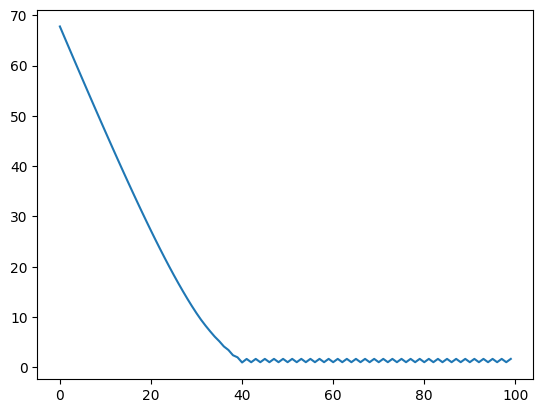

In [176]:
plt.plot(Error)

In [185]:
#Intial guess #Testing rate of change of Jacobian
VR = np.ones((1,N),dtype='complex128')
#VR = get_v(10, mag_high, mag_low, angle_high, angle_low)[:,0]
VC = np.reshape(VR,(N,1))
#VC=V
#VR = np.reshape(VC,(1,N))
print(VC)
print(v)
Error = []
ErrorJ = []
itr = 100
Sref = get_S(Ybus,V)
Jr2= np.zeros((N,N),dtype=complex)
for i in range(itr):
    #Jacobian calcuation
    S = get_S(Ybus,VC)
    error2 = 100*np.linalg.norm(Sref-S)/np.linalg.norm(Sref)
    J1 = VR.conj()*Ybus
    J2P = np.reshape(Ybus@VC,(N))
    J2  = np.diag(J2P)

    #power calculation
    S = get_S(Ybus,VC)
    error1 = np.linalg.norm(Sref-S)
    Jreal = J1 +J2
    EJJ = 100*np.linalg.norm(Jreal-Jr2)/np.linalg.norm(Jr2)  
    ErrorJ.append(EJJ)
    Jr2 =Jreal
    Jimg = 1j*J1 - 1J*J2
    delS = Sref - S
    delR = np.real((delS.T)@Jreal)
    delI = np.real((delS.T)@Jimg)
    delVR = delR/np.linalg.norm(delR)
    delVI = delI/np.linalg.norm(delI)
    VR = VR+0.005*(delVR+1j*delVI)
    VC = np.reshape(VR,(N,1))
    S = get_S(Ybus,VC)
    Error.append(error2)

[[1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]]
[[1.        +0.j        ]
 [1.02709717+0.03399429j]
 [0.96667048+0.07611252j]
 [0.99869099+0.06624394j]
 [0.96498755+0.06143811j]
 [0.95022031+0.12063786j]
 [1.0195172 +0.02643822j]
 [1.01398686+0.03938589j]
 [1.04020046+0.01775677j]
 [0.96086195+0.0709465j ]
 [1.04084418+0.01846765j]
 [1.03508382+0.11113149j]
 [0.98821862+0.17093305j]
 [1.04212192+0.10465868j]
 [0.95920807+0.09353849j]
 [1.03848474+0.00833761j]
 [0.97963038+0.11637447j]
 [0.99966464+0.03993995j]
 [1.03509778+0.06704811j]
 [0.96770841+0.05091884j]
 [0.95638499+0.05021942j]]


/tmp/ipykernel_653773/3970079606.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  EJJ = 100*np.linalg.norm(Jreal-Jr2)/np.linalg.norm(Jr2)


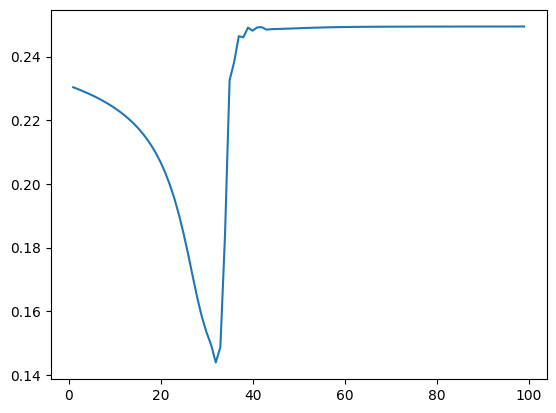

In [187]:
plt.plot(ErrorJ)